In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from collections import Counter
import pandas as pd

Text(0.5, 1.0, 'Counts for Each Event')

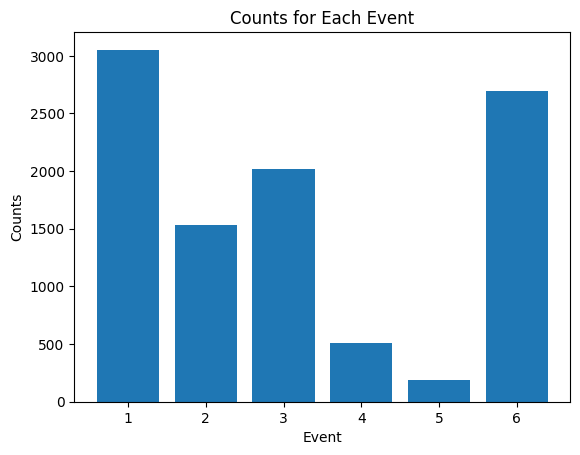

In [22]:
# -----------Counts for each event-----------

np.random.seed(42)

events       = list(range(1, 7))
nrolls       = 10000
probabilties = [0.3, 0.15, 0.2, 0.05, 0.02, 0.28] # Probabilities for each

outcomes = []

for i in range(nrolls):
    x = np.random.choice(events, p = probabilties)
    outcomes.append(x)

counts = Counter(outcomes)

data = pd.DataFrame({
    'Event': list(counts.keys()),
    'Frequency': list(counts.values())   
})

data = data.sort_values('Event')

plt.figure(1)
plt.bar(data['Event'].tolist(), data['Frequency'].tolist())
plt.xlabel('Event')
plt.ylabel('Counts')
plt.title('Counts for Each Event')


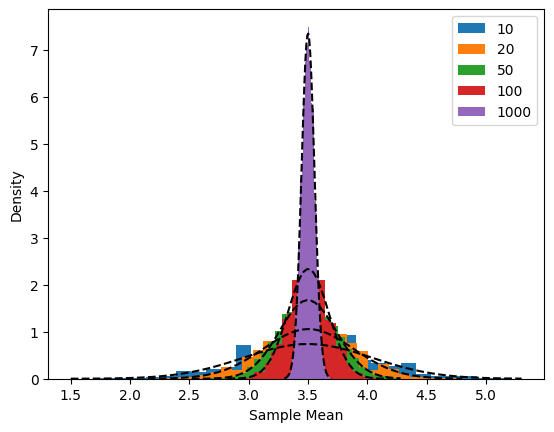

In [30]:
# -----------CLT for unfair dice-----------

nsamples = [10, 20, 50, 100,1000]

for n in nsamples:
    sample_means = []

    for i in range(nrolls):
        sample = np.random.randint(1, 7, n)
        sample_means.append(np.mean(sample))

    plt.hist(sample_means, bins = 30, density = True, label = f'{n}')

    # Gaussian Overlay
    mu    = np.mean(sample_means)
    sigma = np.std(sample_means)
    x     = np.linspace(np.min(sample_means), np.max(sample_means))
    plt.plot(x, norm.pdf(x, mu, sigma), linestyle = '--', color = 'black')

plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
    